# Problem Statement
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. Metric Submissions are evaluated on Mean-Squared-Error (MSE). The file should contain a header and have the following format:

Id,SalePrice 1461,169000.1 1462,187724.1233 1463,175221

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
from os import chdir
chdir("F:/Etlhive/Housing_Salesprice_Project-main/")

In [3]:
import pandas as pd
train = pd.read_csv("training_set.csv")
test = pd.read_csv("testing_set.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#Missing Data treatment

In [7]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train.Alley = train.Alley.fillna("No alley access")
train.BsmtQual = train.BsmtQual.fillna("No Basement")
train.BsmtCond = train.BsmtCond.fillna("No Basement")
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
train.GarageType = train.GarageType.fillna("No Garage")
train.GarageFinish = train.GarageFinish.fillna("No Garage")
train.GarageQual = train.GarageQual.fillna("No Garage")
train.GarageCond = train.GarageCond.fillna("No Garage")
train.PoolQC = train.PoolQC.fillna("No Pool")
train.Fence = train.Fence.fillna("No Fence")
train.MiscFeature = train.MiscFeature.fillna("None")

In [9]:
test.Alley = test.Alley.fillna("No alley access")
test.BsmtQual = test.BsmtQual.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")
test.BsmtExposure = test.BsmtExposure.fillna("No Basement")
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")
test.GarageType = test.GarageType.fillna("No Garage")
test.GarageFinish = test.GarageFinish.fillna("No Garage")
test.GarageQual = test.GarageQual.fillna("No Garage")
test.GarageCond = test.GarageCond.fillna("No Garage")
test.PoolQC = test.PoolQC.fillna("No Pool")
test.Fence = test.Fence.fillna("No Fence")
test.MiscFeature = test.MiscFeature.fillna("None")

In [10]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [12]:
cat = []
con = []
for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        con.append(i)
        x = round(train[i].mean(),2)
        train[i] = train[i].fillna(x)

In [13]:
for i in test.columns:
    if(test[i].dtypes == "object"):
        x = test[i].mode()[0]
        test[i] = test[i].fillna(x)
    else:
        x = round(test[i].mean(),2)
        test[i] = test[i].fillna(x)

In [14]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [15]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

#Intial X and Y

In [16]:
Y = train[['SalePrice']]
X = train.drop(labels=["Id","SalePrice"],axis=1)

#Divide data into Categorical and Continuous

In [17]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

#Standardize Data

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

#Remove Outliers

In [19]:
outliers = []
for i in X1.columns:
    outliers.extend(list(X1[(X1[i]>3) | (X1[i]<-3)].index))

In [20]:
import numpy as np
outliers = np.unique(outliers)

In [21]:
X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [22]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal
6,20,RL,75.0,10084,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,8,2007,WD,Normal
10,20,RL,70.0,11200,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,RM,35.0,3675,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,5,2006,WD,Normal
1453,20,RL,90.0,17217,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,7,2006,WD,Abnorml
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,10,2009,WD,Normal
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,8,2007,WD,Normal


In [23]:
Y

,SalePrice
0,208500
2,223500
4,250000
6,307000
10,129500
...,...
1452,145000
1453,84500
1454,185000
1455,175000


In [24]:
X.shape

(1021, 79)

In [25]:
Y.shape

(1021, 1)

In [26]:
X.index = range(0,1021,1)
Y.index = range(0,1021,1)

#Remove Categorical data if pvalue is greater than 0.05

In [27]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "SalePrice ~ " + str(i)
    model = ols(rel,train).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    print(rel,"--->  ",round(anova_results.iloc[0,4],4))

SalePrice ~ MSZoning --->   0.0
SalePrice ~ Street --->   0.117
SalePrice ~ Alley --->   0.0
SalePrice ~ LotShape --->   0.0
SalePrice ~ LandContour --->   0.0
SalePrice ~ Utilities --->   0.5847
SalePrice ~ LotConfig --->   0.0
SalePrice ~ LandSlope --->   0.1414
SalePrice ~ Neighborhood --->   0.0
SalePrice ~ Condition1 --->   0.0
SalePrice ~ Condition2 --->   0.0434
SalePrice ~ BldgType --->   0.0
SalePrice ~ HouseStyle --->   0.0
SalePrice ~ RoofStyle --->   0.0
SalePrice ~ RoofMatl --->   0.0
SalePrice ~ Exterior1st --->   0.0
SalePrice ~ Exterior2nd --->   0.0
SalePrice ~ MasVnrType --->   0.0
SalePrice ~ ExterQual --->   0.0
SalePrice ~ ExterCond --->   0.0
SalePrice ~ Foundation --->   0.0
SalePrice ~ BsmtQual --->   0.0
SalePrice ~ BsmtCond --->   0.0
SalePrice ~ BsmtExposure --->   0.0
SalePrice ~ BsmtFinType1 --->   0.0
SalePrice ~ BsmtFinType2 --->   0.0
SalePrice ~ Heating --->   0.0008
SalePrice ~ HeatingQC --->   0.0
SalePrice ~ CentralAir --->   0.0
SalePrice ~ Electric

In [28]:
cat.remove("Street")
cat.remove("Utilities")
cat.remove("LandSlope")

In [29]:
train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470169
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

#Consider only highest Correlated features based on Correlation

In [30]:
train.corr()["SalePrice"].sort_values().index[0:13]

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea'],
      dtype='object')

In [31]:
u = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea']

for i in u:
    con.remove(i)

In [32]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])

#Join both Continuous and Categorical data

In [34]:
Xnew = X1.join(X2)

In [35]:
Xnew

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.142725,-0.196750,0.683815,0.953684,0.812282,0.861524,0.708378,-1.019148,-0.443385,-0.743179,...,0,0,0,1,0,0,0,0,1,0
1,0.020778,0.572050,0.683815,0.884839,0.764039,0.600444,0.168088,-0.349506,-0.268596,-0.551152,...,0,0,0,1,0,0,0,0,1,0
2,0.892795,1.398510,1.435348,0.850416,0.667554,2.044059,0.583129,-0.217464,0.345898,0.123940,...,0,0,0,1,0,0,0,0,1,0
3,0.402285,0.251900,1.435348,0.988107,0.908768,0.784736,2.336615,-0.625380,1.823416,1.771164,...,0,0,0,1,0,0,0,0,1,0
4,0.129780,0.558321,-0.819253,-0.354374,-1.020940,-0.643521,1.199551,-1.056875,0.059134,-0.191103,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,-1.777756,-1.507829,-0.819253,1.022529,0.908768,-0.029217,0.317896,-1.372832,-1.287291,-0.095090,...,0,0,0,1,0,0,0,0,1,0
1017,1.219801,2.210418,-0.819253,1.056952,0.957010,-0.643521,-1.025461,1.315167,0.332243,0.108937,...,0,0,0,1,1,0,0,0,0,0
1018,-0.306228,-0.457593,0.683815,0.988107,0.908768,-0.643521,-0.018557,0.539420,0.553461,0.351971,...,0,0,0,1,0,0,0,0,1,0
1019,-0.306228,-0.343097,-0.067719,0.815994,0.667554,-0.643521,-1.025461,0.874241,-0.178470,-0.452139,...,0,0,0,1,0,0,0,0,1,0


In [36]:
Xnew.shape

(1021, 255)

In [37]:
Y.shape

(1021, 1)

#Split the Data into Training and Testing Set

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

#Create Backward Elemination Model

In [40]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain,has_constant="add")

In [41]:
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.02
Date:                Sat, 01 Oct 2022   Prob (F-statistic):          6.08e-292
Time:                        20:59:45   Log-Likelihood:                -9054.5
No. Observations:                 816   AIC:                         1.851e+04
Df Residuals:                     616   BIC:                         1.945e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.333e+04   2178.289      6.117      0.000    9047.773    1.76e+04
LotFrontage               -266.4252   1146.443     -0.232      0.816   -2517.836    1984.985
LotArea                   5142.1532   1239.017      4.150      0.000    2708.943    7575.363
OverallQual               8225.7713   1600.579      5.139      0.000    5082.519    1.14e+04
YearBuilt                 6684.8536   2824.732      2.367      0.018    1137.581    1.22e+04
YearRemodAdd              5781.0512   1373.400      4.209      0.000    3083.937    8478.166
MasVnrArea                -861.1007   1280.919     -0.672      0.502   -3376.599    1654.398
BsmtFinSF1                -464.0506   8501.900     -0.055      0.956   -1.72e+04    1.62e+04
BsmtUnfSF                -7112.4224   8957.034     -0.794      0.427   -2.47e+04    1.05e+04
TotalBsmtSF               1.422e+04   7908.072      1.799      0.073   -1306.003    2.98e+04
1stFlrSF                  7202.6049   4.76e+04      0.151      0.880   -8.63e+04    1.01e+05
2ndFlrSF                  1.771e+04   5.82e+04      0.304      0.761   -9.67e+04    1.32e+05
GrLivArea                 9592.0505   6.22e+04      0.154      0.878   -1.13e+05    1.32e+05
BsmtFullBath              -278.2839   1143.314     -0.243      0.808   -2523.550    1966.982
FullBath                  -583.2277   1492.683     -0.391      0.696   -3514.591    2348.136
HalfBath                   251.2976   1257.040      0.200      0.842   -2217.306    2719.901
BedroomAbvGr             -1100.1187   1255.045     -0.877      0.381   -3564.805    1364.568
TotRmsAbvGrd               426.2803   1655.399      0.258      0.797   -2824.630    3677.191
Fireplaces                -418.4419   2049.280     -0.204      0.838   -4442.865    3605.981
GarageYrBlt              -2394.4310   1933.742     -1.238      0.216   -6191.958    1403.096
GarageCars                2667.5878   1911.611      1.395      0.163   -1086.476    6421.652
GarageArea                4431.6809   1858.717      2.384      0.017     781.490    8081.872
WoodDeckSF                3440.2774    813.520      4.229      0.000    1842.669    5037.886
OpenPorchSF               2182.2623    862.036      2.532      0.012     489.376    3875.149
ScreenPorch               1094.1589    723.836      1.512      0.131    -327.326    2515.644
MSZoning_C (all)         -2.305e+04   1.02e+04     -2.251      0.025   -4.32e+04   -2940.859
MSZoning_FV               2.347e+04   6684.528      3.511      0.000    1.03e+04    3.66e+04
MSZoning_RH              -1383.8473   8738.917     -0.158      0.874   -1.85e+04    1.58e+04
MSZoning_RL               6009.6151   4114.647      1.461      0.145   -2070.821    1.41e+04
MSZoning_RM               8278.5218   4796.827      1.726      0.085   -1141.596    1.77e+04
Alley_Grvl    

In [42]:
model.rsquared_adj

0.925694687920248

In [43]:
col_drop = model.pvalues.sort_values().index[-1]

In [44]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9257
Neighborhood_SawyerW
0.9257
Foundation_PConc
0.9257
Exterior1st_WdShing
0.9257
Condition2_RRNn
0.9257
BsmtFinType2_Unf
0.9257
BsmtFinType1_BLQ
0.9257
SaleType_Oth
0.9257
Foundation_Slab


In [45]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9258
BsmtFinSF1
0.9259
BldgType_Twnhs
0.9259
Condition1_RRNe
0.9259
Exterior2nd_Plywood
0.9259
Foundation_Wood
0.9259
Exterior2nd_Wd Shng
0.9261
Exterior1st_MetalSd
0.9262
GarageCond_TA


In [46]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9262
Condition2_Norm
0.9262
Functional_Maj2
0.9262
Functional_Min1
0.9263
Heating_GasW
0.9263
Heating_Floor
0.9263
BsmtFinType1_Rec
0.9264
Electrical_FuseP
0.9264
SaleType_WD


In [47]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9265
LotConfig_FR2
0.9265
1stFlrSF
0.9266
HouseStyle_1.5Fin
0.9266
MSZoning_RH
0.9266
RoofStyle_Gable
0.9266
KitchenQual_TA
0.9266
Exterior2nd_Brk Cmn
0.9268
Neighborhood_BrkSide


In [48]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9269
Neighborhood_Blueste
0.927
BsmtFullBath
0.9271
PavedDrive_P
0.9271
HouseStyle_SLvl
0.9272
RoofMatl_WdShake
0.9272
RoofStyle_Flat
0.9272
RoofMatl_Tar&Grv
0.9273
HeatingQC_Fa


In [49]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9273
HeatingQC_Gd
0.9274
LotFrontage
0.9275
HalfBath
0.9276
Foundation_CBlock
0.9278
MasVnrType_BrkCmn
0.9278
Fireplaces
0.9279
MasVnrType_None
0.928
SaleCondition_Family


In [50]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.928
TotRmsAbvGrd
0.9281
KitchenQual_Fa
0.9282
Condition2_Feedr
0.9283
Heating_Grav
0.9284
Exterior2nd_ImStucc
0.9285
RoofStyle_Mansard
0.9286
GarageCond_Gd
0.9287
FireplaceQu_No Fireplace


In [51]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9287
RoofMatl_WdShngl
0.9288
BsmtCond_Fa
0.9288
RoofStyle_Gambrel
0.9289
BldgType_Duplex
0.929
GarageType_BuiltIn
0.929
GarageType_Detchd
0.9291
GarageType_Basment
0.9292
BsmtExposure_Av


In [52]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9292
Heating_GasA
0.9292
SaleType_ConLw
0.9293
BsmtFinType2_ALQ
0.9294
BsmtFinType1_LwQ
0.9295
BldgType_TwnhsE
0.9296
Exterior1st_CBlock
0.9296
Exterior2nd_CBlock
0.9297
HouseStyle_SFoyer


In [53]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9298
FullBath
0.9299
SaleType_ConLI
0.9299
Exterior2nd_BrkFace
0.93
Condition1_RRAn
0.93
Condition1_Feedr
0.9301
Fence_MnWw
0.9301
Alley_Pave
0.9301
Alley_No alley access


In [54]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9302
Alley_Grvl
0.9303
GarageCond_Ex
0.9303
GarageQual_TA
0.9303
GarageQual_Ex
0.9304
Neighborhood_Veenker
0.9305
Exterior2nd_AsbShng
0.9305
Exterior2nd_Stone
0.9306
ExterQual_Gd


In [55]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9306
ExterQual_TA
0.9307
SaleType_Con
0.9308
Condition1_RRNn
0.9308
LotConfig_FR3
0.9309
SaleCondition_Abnorml
0.931
BsmtFinType2_Rec
0.931
Exterior1st_Stucco
0.9311
MSZoning_RL


In [56]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9312
MSZoning_RM
0.9312
Neighborhood_IDOTRR
0.9313
SaleType_ConLD
0.9314
BldgType_2fmCon
0.9314
BsmtFinType2_LwQ
0.9315
BsmtFinType1_Unf
0.9315
GarageCond_Po
0.9316
PavedDrive_Y


In [57]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9317
PavedDrive_N
0.9317
LandContour_Low
0.9317
Exterior1st_CemntBd
0.9318
Fence_GdPrv
0.9318
Fence_GdWo
0.9319
Fence_MnPrv
0.9319
Fence_No Fence
0.932
Exterior1st_ImStucc


In [58]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9321
Condition1_PosA
0.9321
Exterior2nd_HdBoard
0.9322
LotShape_IR3
0.9322
BedroomAbvGr
0.9322
Condition1_Artery
0.9322
SaleType_COD
0.9322
Exterior2nd_Other
0.9323
HeatingQC_TA


In [59]:
for i in range(0,8):
    Xnew = Xnew.drop(labels=col_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain,has_constant="add")
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    print(round(model.rsquared_adj,4))
    col_drop = model.pvalues.sort_values().index[-1]
    print(col_drop)

0.9323
MasVnrArea
0.9323
MasVnrType_BrkFace
0.9323
BsmtFinType2_BLQ
0.9324
GarageCond_Fa
0.9324
Neighborhood_Somerst
0.9323
SaleType_New
0.9323
Exterior1st_AsbShng
0.9323
BsmtCond_Gd


In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err)
print(ts_err)

264023137.26
7.109277238337266e+29


Since training error is less than testing error. Model suffers from Overfitting.
#Regularization using Lasso and Ridge regression

#Ridge Regression

In [70]:
tr = []
ts = []

In [71]:
w = []
y = 10.0
for i in range(0,1000):
    y = round(y + 0.01,2)
    w.append(y)

In [72]:
from sklearn.linear_model import Ridge

In [73]:
for i in w:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain) 
    ts_pred = model.predict(xtest)
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    tr.append(tr_err)
    ts.append(ts_err)
    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    else:
        print("Good fit")

========== 10.01 ===========
305594503.81
310487228.59
Overfitting
========== 10.02 ===========
305624540.82
310504155.43
Overfitting
========== 10.03 ===========
305654562.8
310521092.75
Overfitting
========== 10.04 ===========
305684569.78
310538040.51
Overfitting
========== 10.05 ===========
305714561.78
310554998.66
Overfitting
========== 10.06 ===========
305744538.8
310571967.14
Overfitting
========== 10.07 ===========
305774500.86
310588945.92
Overfitting
========== 10.08 ===========
305804448.0
310605934.94
Overfitting
========== 10.09 ===========
305834380.21
310622934.15
Overfitting
========== 10.1 ===========
305864297.52
310639943.52
Overfitting
========== 10.11 ===========
305894199.95
310656962.98
Overfitting
========== 10.12 ===========
305924087.52
310673992.5
Overfitting
========== 10.13 ===========
305953960.23
310691032.03
Overfitting
========== 10.14 ===========
305983818.11
310708081.52
Overfitting
========== 10.15 ===========
306013661.18
310725140.92
Overfitting


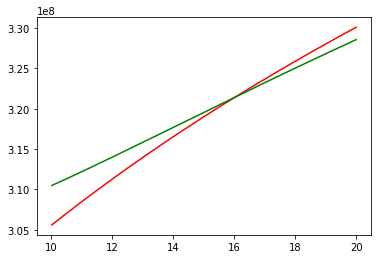

In [74]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [75]:
rr = Ridge(alpha=16.39)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err,ts_err)

322290343.5 322122851.6


#Lasso Regression

In [76]:
w = []
y = 300
for i in range(0,1000):
    y = round(y + 0.05,2)
    w.append(y) 

In [77]:
from sklearn.linear_model import Lasso
tr = []
ts = []
for i in w:
    rr = Lasso(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain) 
    ts_pred = model.predict(xtest)
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    tr.append(tr_err)
    ts.append(ts_err)
    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    else:
        print("Good fit")

========== 300.05 ===========
375653428.06
375891536.37
Overfitting
========== 300.1 ===========
375666952.59
375902723.11
Overfitting
========== 300.15 ===========
375680479.36
375913912.24
Overfitting
========== 300.2 ===========
375694007.71
375925109.82
Overfitting
========== 300.25 ===========
375707537.3
375936311.44
Overfitting
========== 300.3 ===========
375721069.11
375947515.55
Overfitting
========== 300.35 ===========
375734603.17
375958722.05
Overfitting
========== 300.4 ===========
375748139.57
375969932.27
Overfitting
========== 300.45 ===========
375761678.38
375981147.39
Overfitting
========== 300.5 ===========
375775218.73
375992365.39
Overfitting
========== 300.55 ===========
375788760.92
376003586.07
Overfitting
========== 300.6 ===========
375802306.45
376014813.46
Overfitting
========== 300.65 ===========
375815854.24
376026043.24
Overfitting
========== 300.7 ===========
375829405.74
376037278.3
Overfitting
========== 300.75 ===========
375842960.24
376048517.22
O

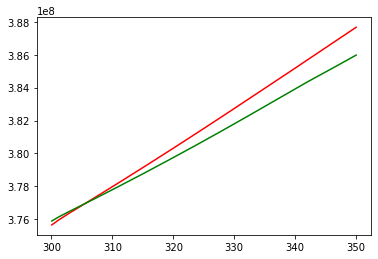

In [78]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [79]:
rr = Lasso(alpha=307)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err,ts_err)

377291709.81 377228862.74


#Use Trained Data to get prediction on Testing Set

In [80]:
cat

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [81]:
con

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch']

In [82]:
Xtest1= pd.DataFrame(ss.fit_transform(test[con]),columns=con)

In [83]:
Xtest2 = pd.get_dummies(test[cat])

In [84]:
Xtest_new = Xtest1.join(Xtest2)

In [85]:
Xtest_new

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.555590,0.363929,-0.751101,-0.340945,-1.072885,-0.570108,0.063295,-0.650619,-0.370808,-0.654561,...,0,0,0,1,0,0,0,0,1,0
1,0.604242,0.897861,-0.054877,-0.439695,-1.214908,0.041273,1.063392,-0.339378,0.639144,0.433298,...,0,0,0,1,0,0,0,0,1,0
2,0.263679,0.809646,-0.751101,0.844059,0.678742,-0.570108,0.773254,-0.954994,-0.266876,-0.574165,...,0,0,0,1,0,0,0,0,1,0
3,0.458286,0.032064,-0.054877,0.876976,0.678742,-0.456889,0.357829,-0.527038,-0.271395,-0.579190,...,0,0,0,1,0,0,0,0,1,0
4,-1.244530,-0.971808,1.337571,0.679475,0.394694,-0.570108,-0.387298,1.058917,0.528434,0.310192,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.314872,-1.591330,-1.447325,-0.044694,-0.646813,-0.570108,-0.965376,-0.018983,-1.129968,-1.533893,...,0,0,0,1,0,0,0,0,1,0
1455,-2.314872,-1.599808,-1.447325,-0.044694,-0.646813,-0.570108,-0.411477,-0.595694,-1.129968,-1.533893,...,0,0,0,1,1,0,0,0,0,0
1456,4.447742,2.055150,-0.751101,-0.373861,0.584059,-0.570108,1.724994,-1.268524,0.401907,0.169499,...,0,0,0,1,1,0,0,0,0,0
1457,-0.320144,0.125527,-0.751101,0.679475,0.394694,-0.570108,-0.224645,0.047384,-0.303026,-0.468645,...,0,0,0,1,0,0,0,0,1,0


In [86]:
cols_to_keep = xtrain.columns

In [87]:
final_test= Xtest_new[cols_to_keep]

In [88]:
pred = model.predict(final_test)

In [89]:
T = test[["Id"]]
T['SalePrice']=pred

In [90]:
T.head(3)

,Id,SalePrice
0,1461,121592.677190
1,1462,166011.643893
2,1463,187042.390680


In [91]:
#Save the predicted Output in .CSV format

In [ ]:
#T.to_csv("D:/Etlhive/1st project/sample_submission.csv")

In [96]:
T.to_csv("submission.csv")

In [97]:
T.head()

,Id,SalePrice
0,1461,121592.677190
1,1462,166011.643893
2,1463,187042.390680
3,1464,197278.466127
4,1465,192741.076612
